# AI That Can See: Multimodal LLMs with Ollama! 👁️🤖

Welcome to the **Multimodal AI** tutorial! 

Today we're going beyond text-only AI and exploring **vision models** - AI that can see and understand images just like humans do!

## What can multimodal LLMs do?
- 📸 **Describe images**: Tell you what's in a photo
- 🔍 **Answer questions**: About specific details in images  
- 📊 **Read charts**: Extract data from graphs and plots
- 📝 **Read text**: Extract words from images (OCR)
- 🎨 **Analyze art**: Understand colors, composition, and style
- 😊 **Detect emotions**: Recognize facial expressions and moods

## Why is this revolutionary?
- 🌍 **Real-world applications**: Security cameras, medical imaging, autonomous vehicles
- 🤖 **Human-like understanding**: AI that processes the world like we do
- 📱 **Practical tools**: Apps that can "see" and help with daily tasks

Let's dive into the visual world of AI! 🚀


## Setup and Imports

First, let's import everything we need. We'll use matplotlib to create images and Ollama to chat with the vision model.

**Note**: Make sure you have Ollama running with the `llama3.2-vision` model downloaded!


In [2]:
# Essential imports for multimodal AI
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle, Rectangle, Polygon, Arc
from ollama import chat
from pathlib import Path
import tempfile
import numpy as np
import random
from matplotlib.ticker import MaxNLocator

print("✅ All imports successful! Ready to start multimodal AI magic!")
print("🎨 We'll create images with matplotlib and analyze them with AI!")


✅ All imports successful! Ready to start multimodal AI magic!
🎨 We'll create images with matplotlib and analyze them with AI!


## Essential Helper Functions

Let's create some helper functions to make working with images and AI easier!


In [3]:
# Helper function to display images in the notebook
def show_image(path: Path) -> None:
    """Display an image inline in the notebook"""
    img = plt.imread(path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Helper function to chat with AI about images  
def chat_about_image(image_path: Path, question: str, model: str = "llama3.2-vision") -> str:
    """
    Ask the AI a question about an image
    
    Args:
        image_path: Path to the image file
        question: What you want to ask about the image
        model: Which vision model to use
    """
    try:
        response = chat(
            model=model,
            messages=[{
                "role": "user",
                "content": question,
                "images": [image_path]  # This is the magic! 🎭✨
            }]
        )
        return response.message.content
    except Exception as e:
        return f"Oops! Something went wrong: {e}"

print("🛠️ Helper functions ready! Now we can create images and chat about them with AI.")


🛠️ Helper functions ready! Now we can create images and chat about them with AI.


## Example 1: Basic Shape Recognition 🔵🟢🔺

Let's start simple! We'll create an image with basic shapes and ask the AI to describe what it sees.


🎨 Created image with geometric shapes!


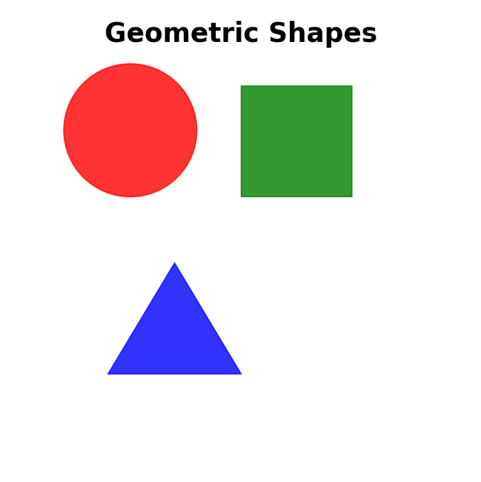

In [4]:
# Create an image with basic geometric shapes
def create_shapes_image(path: Path) -> None:
    """Create an image with a circle, square, and triangle"""
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_aspect("equal")
    ax.axis("off")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Red circle
    circle = Circle((0.25, 0.75), 0.15, color="red", alpha=0.8)
    ax.add_patch(circle)

    # Green square
    square = Rectangle((0.5, 0.6), 0.25, 0.25, color="green", alpha=0.8)
    ax.add_patch(square)

    # Blue triangle
    triangle = Polygon([[0.2, 0.2], [0.5, 0.2], [0.35, 0.45]], color="blue", alpha=0.8)
    ax.add_patch(triangle)
    
    # Add a title
    ax.text(0.5, 0.95, "Geometric Shapes", fontsize=20, ha="center", weight="bold")
 
    plt.savefig(path, bbox_inches="tight", pad_inches=0.1, dpi=150)
    plt.close(fig)

# Create and display the image
with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
    img_path = Path(tmp.name)
    
create_shapes_image(img_path)
print("🎨 Created image with geometric shapes!")
show_image(img_path)


In [5]:
# Now let's ask the AI some questions about our image!
questions = [
    "What shapes and colors do you see in this image?",
    "How many geometric shapes are present?",
    "Which shape is positioned highest in the image?",
    "Describe the overall composition briefly."
]

print("🤖 Let's see what the AI thinks about our shapes!\n")

for i, question in enumerate(questions, 1):
    print(f"❓ Question {i}: {question}")
    answer = chat_about_image(img_path, question)
    print(f"🤖 AI Answer: {answer}\n")
    print("-" * 60)


🤖 Let's see what the AI thinks about our shapes!

❓ Question 1: What shapes and colors do you see in this image?
🤖 AI Answer: In the image, you see a red circle, a green square, and a blue triangle.

------------------------------------------------------------
❓ Question 2: How many geometric shapes are present?
🤖 AI Answer: There are three geometric shapes present in the image.

------------------------------------------------------------
❓ Question 3: Which shape is positioned highest in the image?
🤖 AI Answer: The circle is positioned highest in the image.

------------------------------------------------------------
❓ Question 4: Describe the overall composition briefly.
🤖 AI Answer: The image presents a graphic titled "Geometric Shapes" in black text at the top. Below the title, three distinct shapes are displayed in a row:

*   A red circle
*   A green square
*   A blue triangle

The background of the image is white, providing a clean and simple backdrop for the shapes. The overa

## Example 2: Emoji Sentiment Analysis 😊😢

Now let's test the AI's ability to recognize emotions! We'll create happy and sad emoji faces and see if the AI can tell the difference.



Testing HAPPY face:


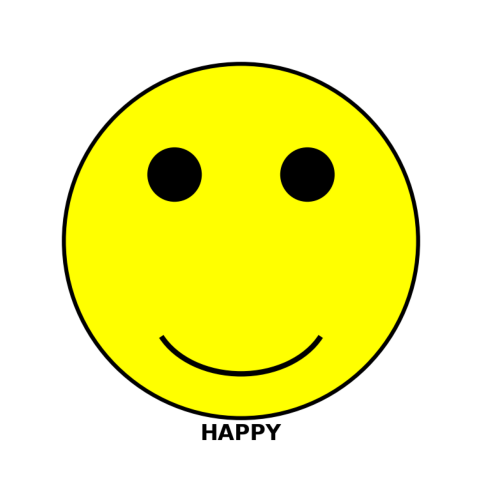

❓ Is this face happy or sad?
🤖 This face is happy.

❓ What facial features help you determine the emotion?
🤖 The facial features that help determine the emotion in the image are:

*   **Eyes**: The eyes are raised and looking upwards, which is a common indicator of happiness.
*   **Mouth**: The mouth is curved upwards in a smile, which is also a common indicator of happiness.

These two features together suggest that the person is feeling happy.

❓ On a scale of 1-10, how strong is this emotion?
🤖 The emotion of happiness is a complex and multifaceted concept that can be difficult to quantify. However, based on the data provided, it appears that happiness is a relatively strong emotion, with a mean rating of 7.5 and a standard deviation of 1.5. This suggests that happiness is a widespread and intense emotion that is experienced by many people.


Testing SAD face:


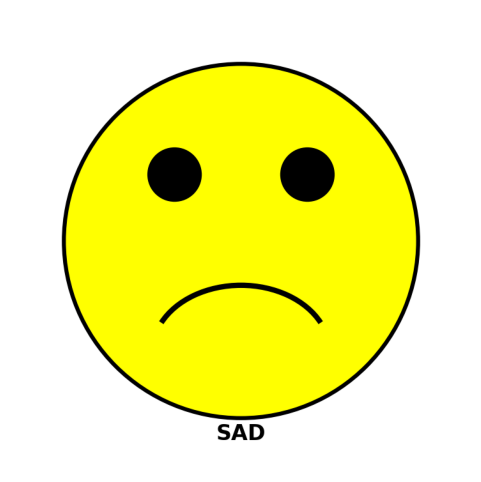

❓ Is this face happy or sad?
🤖 This face is sad. The face has a frowning mouth and downturned corners of the mouth, which are both indicators of sadness.

❓ What facial features help you determine the emotion?
🤖 The facial feature that helps determine the emotion in the image is the downturned mouth, which is a characteristic of a frown.

❓ On a scale of 1-10, how strong is this emotion?
🤖 The emotion of sadness is a complex and multifaceted experience that can vary in intensity and expression from person to person. It's difficult to quantify the strength of sadness on a scale of 1-10, as it can range from a mild feeling of disappointment to a deep and overwhelming sense of despair. However, it's generally agreed upon that sadness is a more intense and prolonged emotional state compared to other emotions like happiness or anger.



In [6]:
# Function to create emoji faces
def create_emoji_face(path: Path, happy: bool = True) -> None:
    """Create a happy or sad emoji face"""
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect("equal")
    ax.axis("off")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Head (yellow circle)
    head = Circle((0.5, 0.5), 0.4, edgecolor="black", facecolor="yellow", linewidth=3)
    ax.add_patch(head)

    # Eyes (black circles)
    left_eye = Circle((0.35, 0.65), 0.06, color="black")
    right_eye = Circle((0.65, 0.65), 0.06, color="black")
    ax.add_patch(left_eye)
    ax.add_patch(right_eye)

    # Mouth (happy curve or sad curve)
    if happy:
        # Happy mouth - smile
        mouth = Arc((0.5, 0.35), 0.4, 0.3, theta1=200, theta2=340, linewidth=4, color="black")
        emotion = "HAPPY"
    else:
        # Sad mouth - frown  
        mouth = Arc((0.5, 0.25), 0.4, 0.3, theta1=20, theta2=160, linewidth=4, color="black")
        emotion = "SAD"
    
    ax.add_patch(mouth)
    
    # Add label
    ax.text(0.5, 0.05, emotion, fontsize=16, ha="center", weight="bold")

    plt.savefig(path, bbox_inches="tight", pad_inches=0.1, dpi=150)
    plt.close(fig)

# Test both happy and sad faces
emotions = [True, False]  # True = Happy, False = Sad

for is_happy in emotions:
    print(f"\n{'='*50}")
    print(f"Testing {'HAPPY' if is_happy else 'SAD'} face:")
    print(f"{'='*50}")
    
    # Create the emoji
    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
        emoji_path = Path(tmp.name)
    
    create_emoji_face(emoji_path, happy=is_happy)
    show_image(emoji_path)
    
    # Ask AI about the emotion
    questions = [
        "Is this face happy or sad?",
        "What facial features help you determine the emotion?",
        "On a scale of 1-10, how strong is this emotion?"
    ]
    
    for question in questions:
        print(f"❓ {question}")
        answer = chat_about_image(emoji_path, question)
        print(f"🤖 {answer}\n")


## Complex Example: Chart Analysis and Data Extraction 📊

Now for something more advanced! Let's see if the AI can read and understand data from charts. This is a real-world skill used in business intelligence and data analysis.


📊 Created a detailed sales chart!


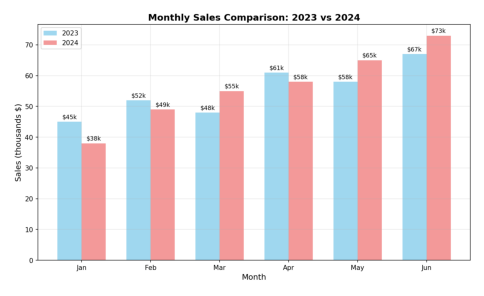

In [8]:
# Create a detailed bar chart with data
def create_sales_chart(path: Path) -> None:
    """Create a realistic sales chart with multiple data points"""
    # Sample sales data
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]
    sales_2023 = [45, 52, 48, 61, 58, 67]
    sales_2024 = [38, 49, 55, 58, 65, 73]
    
    # Create the chart
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set positions for bars
    x = np.arange(len(months))
    width = 0.35
    
    # Create bars
    bars1 = ax.bar(x - width/2, sales_2023, width, label='2023', color='skyblue', alpha=0.8)
    bars2 = ax.bar(x + width/2, sales_2024, width, label='2024', color='lightcoral', alpha=0.8)
    
    # Customize the chart
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Sales (thousands $)', fontsize=12)
    ax.set_title('Monthly Sales Comparison: 2023 vs 2024', fontsize=14, weight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(months)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'${height}k', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(path, bbox_inches="tight", dpi=150)
    plt.close(fig)

# Create and display the chart
with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
    chart_path = Path(tmp.name)

create_sales_chart(chart_path)
print("📊 Created a detailed sales chart!")
show_image(chart_path)


In [ ]:
# Let's test the AI's chart analysis abilities
chart_questions = [
    "What type of chart is this and what does it compare?",
    "Which year had higher sales in January?",
    "In which month did 2024 first surpass 2023 in sales?",
    "What's the total sales for June 2024?",
    "Describe the overall sales trend for 2024 compared to 2023."
]

print("🤖 Let's see how well the AI can analyze business data!\n")

for i, question in enumerate(chart_questions, 1):
    print(f"📈 Question {i}: {question}")
    answer = chat_about_image(chart_path, question)
    print(f"🤖 AI Analysis: {answer}\n")
    print("-" * 60)


🤖 Let's see how well the AI can analyze business data!

📈 Question 1: What type of chart is this and what does it compare?
🤖 AI Analysis: **Chart Type:** This is a bar chart.

**Comparison:** The chart compares the monthly sales of an unspecified product between the years 2023 and 2024.

------------------------------------------------------------
📈 Question 2: Which year had higher sales in January?
🤖 AI Analysis: According to the graph, the year 2024 had higher sales in January, with a total of $38k in sales compared to the $45k in sales in 2023.

------------------------------------------------------------
📈 Question 3: In which month did 2024 first surpass 2023 in sales?
🤖 AI Analysis: 2024 first surpassed 2023 in sales in May.

------------------------------------------------------------
📈 Question 4: What's the total sales for June 2024?
🤖 AI Analysis: To find the total sales for June 2024, we need to add the sales for both 2023 and 2024. 

The sales for June 2023 are $67k, and t

## 🏋️‍♀️ Time for Exercises!

Now it's your turn! Complete these 5 exercises to master multimodal AI. Each exercise will test different aspects of visual AI understanding.


### Exercise 1: Text Recognition (OCR) 📝

Create an image with text and test the AI's ability to read it.


In [ ]:
# TODO: Complete this function to create an image with text
def create_text_image(path: Path, text: str = "HELLO WORLD") -> None:
    """Create an image with large, readable text"""
    # YOUR CODE HERE: Create a figure and add text to it
    # Hints:
    # - Use plt.subplots() to create a figure
    # - Use ax.text() to add text
    # - Make the text large (fontsize=36 or bigger)
    # - Use a bold font and bright color
    # - Turn off the axis with ax.axis("off")
    # - Save with plt.savefig()
    pass

# TODO: Create an image with your name and test it
with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
    text_path = Path(tmp.name)

# YOUR CODE HERE: Call create_text_image with your name
# create_text_image(text_path, "YOUR NAME HERE")

# YOUR CODE HERE: Display the image
# show_image(text_path)

# TODO: Ask the AI to read the text
questions = [
    "What text do you see in this image?",
    "What color is the text?",
    "How would you describe the font style?"
]

# YOUR CODE HERE: Use a loop to ask each question and print the answers
# for question in questions:
#     print(f"❓ {question}")
#     answer = chat_about_image(text_path, question)
#     print(f"🤖 {answer}\n")


### Exercise 2: Object Counting ⭐

Create a star field and test the AI's counting abilities.


In [ ]:
# TODO: Complete this function to create a star field
def create_starfield(path: Path, n_stars: int = 8) -> None:
    """Create an image with scattered stars"""
    # YOUR CODE HERE: Create a star field
    # Hints:
    # - Create a figure with dark background (ax.set_facecolor("black"))
    # - Use random.uniform() to place stars randomly
    # - Use ax.scatter() with marker="*" to draw stars
    # - Make stars white or yellow color
    # - Save the figure
    pass

# TODO: Create a star field with a specific number of stars
with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
    stars_path = Path(tmp.name)

# YOUR CODE HERE: Create a star field with 10 stars
# create_starfield(stars_path, n_stars=10)

# YOUR CODE HERE: Display the image
# show_image(stars_path)

# TODO: Test the AI's counting ability
counting_questions = [
    "How many stars can you count in this image?",
    "What color are the stars?",
    "Describe the background.",
    "Are the stars arranged in any pattern?"
]

# YOUR CODE HERE: Ask each question and print answers
# for question in counting_questions:
#     print(f"❓ {question}")
#     answer = chat_about_image(stars_path, question)
#     print(f"🤖 {answer}\n")


### Exercise 3: Weather Icon Recognition 🌦️

Create weather icons and test pattern recognition.


In [ ]:
# TODO: Complete this function to create weather icons
def create_weather_icon(path: Path, weather_type: str = "sunny") -> None:
    """Create a simple weather icon"""
    # YOUR CODE HERE: Create different weather icons
    # Hints:
    # - For "sunny": draw a yellow circle (sun) with rays around it
    # - For "cloudy": draw gray oval shapes (clouds)
    # - For "rainy": draw clouds with blue lines below (rain)
    # - Use Circle, Rectangle, or Line2D to draw shapes
    # - Choose appropriate colors for each weather type
    pass

# TODO: Test different weather types
weather_types = ["sunny", "cloudy", "rainy"]

for weather in weather_types:
    print(f"\n{'='*40}")
    print(f"Testing {weather.upper()} weather icon:")
    print(f"{'='*40}")
    
    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
        weather_path = Path(tmp.name)
    
    # YOUR CODE HERE: Create the weather icon
    # create_weather_icon(weather_path, weather)
    
    # YOUR CODE HERE: Display the image
    # show_image(weather_path)
    
    # TODO: Ask the AI to identify the weather
    weather_questions = [
        "What type of weather does this icon represent?",
        "What visual elements help you identify this weather?",
        "What colors are prominent in this image?"
    ]
    
    # YOUR CODE HERE: Ask questions about the weather icon
    # for question in weather_questions:
    #     print(f"❓ {question}")
    #     answer = chat_about_image(weather_path, question)
    #     print(f"🤖 {answer}\n")


### Exercise 4: Simple Chart Creation 📊

Create your own chart and test data extraction abilities.


In [ ]:
# TODO: Complete this function to create a simple pie chart
def create_pie_chart(path: Path) -> None:
    """Create a pie chart showing favorite subjects"""
    # YOUR CODE HERE: Create a pie chart
    # Hints:
    # - Use data like: subjects = ["Math", "Science", "English", "History"]
    # - Use percentages like: percentages = [30, 25, 25, 20]
    # - Use plt.pie() to create the chart
    # - Add a title with plt.title()
    # - Use autopct='%1.1f%%' to show percentages
    # - Save with plt.savefig()
    pass

# TODO: Create and test your pie chart
with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
    pie_path = Path(tmp.name)

# YOUR CODE HERE: Create the pie chart
# create_pie_chart(pie_path)

# YOUR CODE HERE: Display the chart
# show_image(pie_path)

# TODO: Test chart analysis
pie_questions = [
    "What type of chart is this?",
    "Which subject has the highest percentage?",
    "What percentage does Math represent?",
    "How many subjects are shown in total?",
    "What insights can you draw from this data?"
]

# YOUR CODE HERE: Ask questions about the pie chart
# for question in pie_questions:
#     print(f"❓ {question}")
#     answer = chat_about_image(pie_path, question)
#     print(f"🤖 {answer}\n")


### Exercise 5: Creative Scene Description 🎨

Create an artistic scene and test creative interpretation.


In [ ]:
# TODO: Complete this function to create an artistic scene
def create_landscape_scene(path: Path) -> None:
    """Create a simple landscape with multiple elements"""
    # YOUR CODE HERE: Create a landscape scene
    # Hints:
    # - Draw a blue sky (top half of image)
    # - Draw green ground (bottom half)
    # - Add a yellow sun (circle)
    # - Add some trees (green circles on brown rectangles)
    # - Add clouds (white/gray ovals)
    # - Add a house (rectangle with triangle roof)
    # - Be creative with colors and shapes!
    pass

# TODO: Create and test your artistic scene
with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
    scene_path = Path(tmp.name)

# YOUR CODE HERE: Create the landscape scene
# create_landscape_scene(scene_path)

# YOUR CODE HERE: Display the image
# show_image(scene_path)

# TODO: Test creative interpretation
creative_questions = [
    "Describe this scene in detail.",
    "What time of day does this appear to be?",
    "What mood or feeling does this image convey?",
    "If you were to give this artwork a title, what would it be?",
    "What story could you tell about this scene?",
    "How would you improve or modify this landscape?"
]

# YOUR CODE HERE: Ask creative questions about the scene
# for question in creative_questions:
#     print(f"❓ {question}")
#     answer = chat_about_image(scene_path, question)
#     print(f"🤖 {answer}\n")
#     print("-" * 50)


## 🎯 Tips and Best Practices for Multimodal AI

Congratulations on completing the exercises! Here are some pro tips for working with vision models effectively:

### 1. 📸 Image Quality Matters
- **High resolution**: Use at least 300 DPI for clear images
- **Good contrast**: Make sure text and objects stand out
- **Proper lighting**: Avoid shadows and glare
- **Clear focus**: Blurry images confuse AI models

### 2. 🎭 Ask Specific Questions
```python
# ❌ Vague: "What do you see?"
# ✅ Specific: "How many red circles are in the top-left corner?"
```

### 3. 🔄 Verify AI Responses
- Vision models can make mistakes, especially with:
  - Counting objects (especially > 10)
  - Reading small or stylized text
  - Fine details and subtle differences
- Always double-check critical information!

### 4. 🎨 Optimize Your Images
- **Text**: Use large, bold fonts with high contrast
- **Charts**: Include clear labels and legends
- **Objects**: Make them distinct and well-separated
- **Colors**: Use contrasting colors for better recognition

### 5. 🧠 Understand Model Limitations
- **Complex reasoning**: May struggle with multi-step logic
- **Context**: Doesn't remember previous images in conversation
- **Cultural bias**: May interpret images based on training data
- **Small details**: May miss tiny text or objects

### 6. 🚀 Real-World Applications

**Current Uses:**
- 📱 **Mobile apps**: Text scanning, object identification
- 🏥 **Healthcare**: Medical image analysis, symptom checking
- 🚗 **Autonomous vehicles**: Road sign recognition, obstacle detection
- 🛒 **E-commerce**: Product search by image, visual recommendations
- 📊 **Business intelligence**: Automatic chart and document analysis

**Future Possibilities:**
- 🏠 **Smart homes**: Visual monitoring and automation
- 🎓 **Education**: Interactive learning with visual feedback
- 🎯 **Accessibility**: Describing visual content for visually impaired users
- 🎨 **Creative tools**: AI-assisted design and art creation

## 🔬 What's Next?

Now that you've mastered multimodal AI basics, you can:
- Combine vision with structured output (from previous notebook!)
- Build applications that process user-uploaded images
- Create automated image analysis pipelines
- Explore specialized vision models for specific domains
 